<a href="https://colab.research.google.com/github/nandinisitlani2/ML-Projects/blob/main/BitcoinPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting data

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-07-02 14:22:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2023-07-02 14:22:53 (49.7 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:
import pandas as pd

df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
               parse_dates=["Date"],
               index_col=["Date"])

In [4]:
df[:5]

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
bitcoin_prices_df=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})


In [7]:
bitcoin_prices_df

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [8]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price')

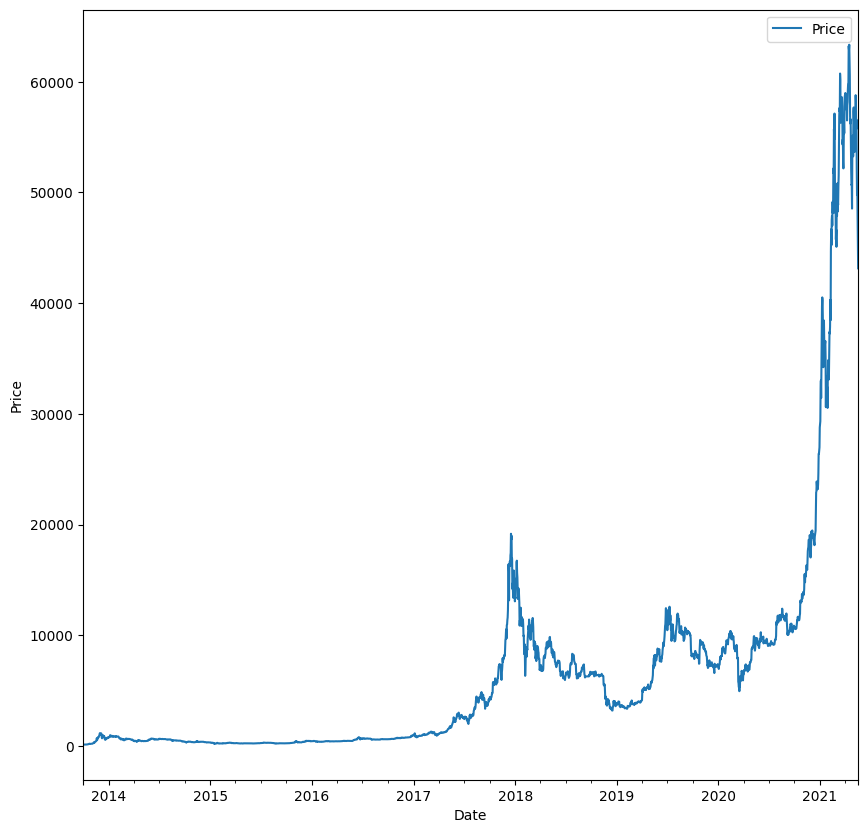

In [9]:
bitcoin_prices_df.plot(figsize=(10,10));

plt.ylabel("Price")

In [10]:
# importing and plotting data with python

In [11]:
import csv
from datetime import datetime
timesteps=[]
btc_price=[]
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
 csv_reader=csv.reader(f,delimiter=",")
 next(csv_reader)
 for line in csv_reader:
  timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
  btc_price.append(float(line[2]))


Text(0.5, 1.0, 'bitcoin price vs time')

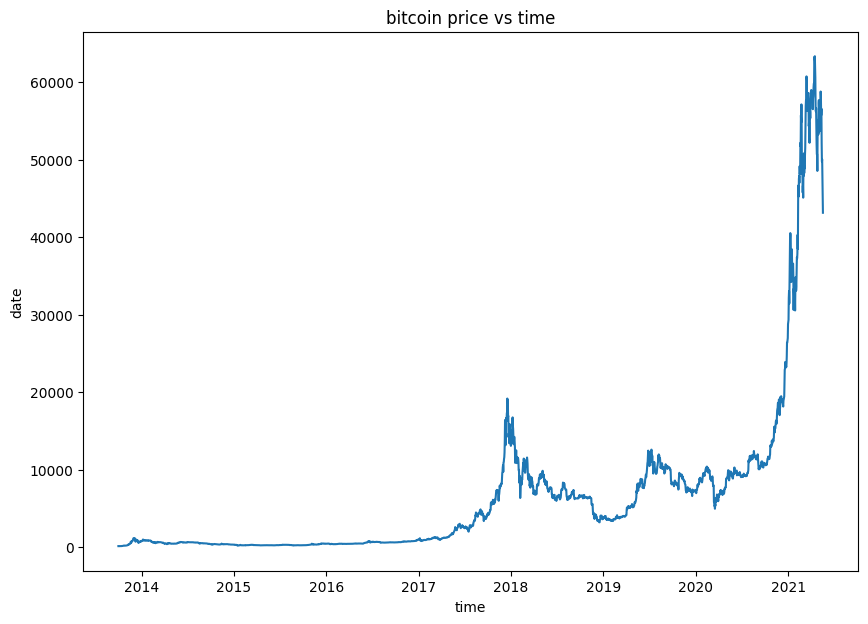

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.xlabel("time")
plt.ylabel("date")
plt.title("bitcoin price vs time")

## train and test sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
timesteps=bitcoin_prices_df.index.to_numpy()
price=bitcoin_prices_df["Price"].to_numpy()

In [15]:
timesteps,price

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', ...,
        '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
        '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([  123.65499   ,   125.455     ,   108.58483   , ...,
        47885.62525472, 45604.61575361, 43144.47129086]))

In [16]:
x_train,x_test,y_train,y_test=train_test_split(timesteps,price,train_size=0.8,random_state=43)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

Text(0, 0.5, 'date')

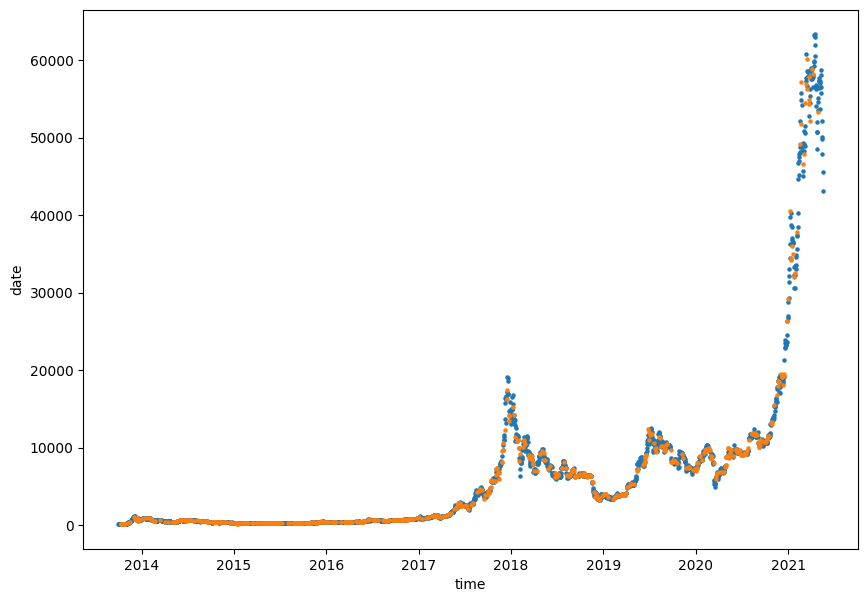

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,s=5)
plt.scatter(x_test,y_test,s=5)
plt.xlabel("time")
plt.ylabel("date")

In [19]:
# this split wont work optimally since there is a data leakage

In [20]:
split_size=int(0.8*len(price))

In [21]:
x_train,y_train=timesteps[:split_size],price[:split_size]
x_test,y_test=timesteps[split_size:],price[split_size:]

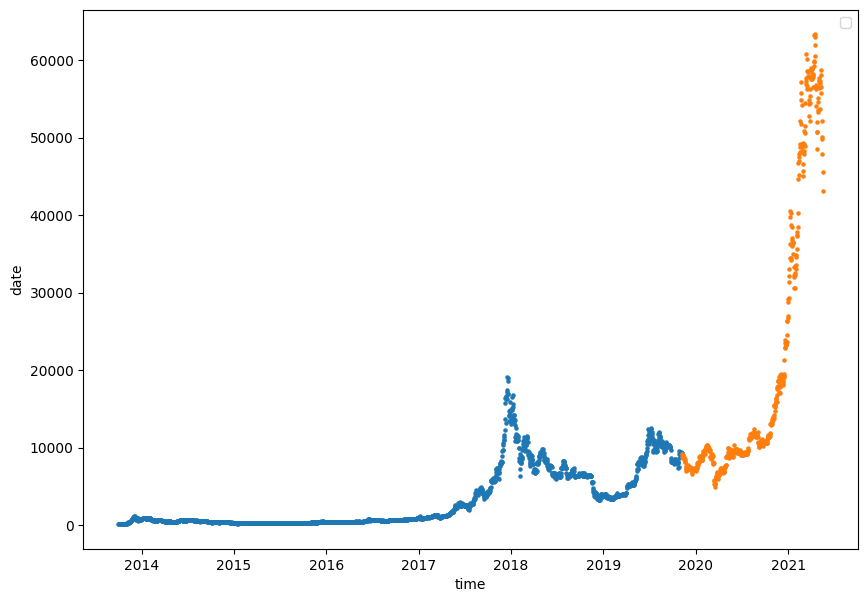

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,s=5)
plt.scatter(x_test,y_test,s=5)
plt.xlabel("time")
plt.ylabel("date")
plt.legend()

In [23]:
def plot_data(timesteps,values,format=".",start=0,end=None,label=None):

  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("time")
  plt.ylabel("date")

  if label:
    plt.legend()





**horizon** = number of timesteps to predict into future
**window** = number of timesteps from past used to predict


## Model:0 NAIVE MODEL

In [24]:
naive_forecast=y_test[:-1]


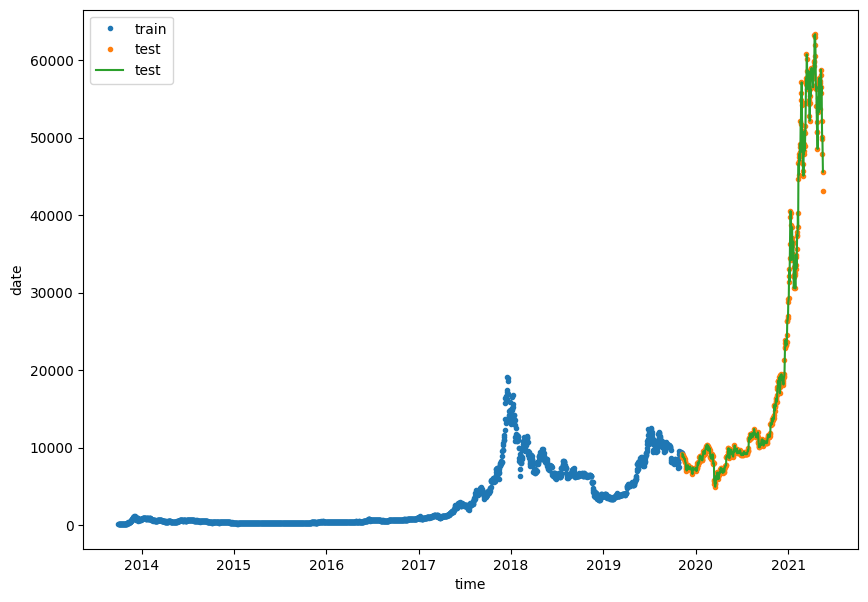

In [25]:
plt.figure(figsize=(10,7))
plot_data(timesteps=x_train,values=y_train,label="train")
plot_data(timesteps=x_test,values=y_test,label="test")
plot_data(timesteps=x_test[1:],values=naive_forecast,label="test",format="-")

In [26]:
import tensorflow as tf

##MASE

In [27]:
def mean_absolute_scaled_error(y_true,y_pred):
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:])-(y_true[:-1]))

  return mae/mae_naive_no_season

In [28]:
mean_absolute_scaled_error(y_true=y_test[1:],
                           y_pred=naive_forecast)

<tf.Tensor: shape=(), dtype=float64, numpy=9.193478043453082>

In [29]:
mean_absolute_scaled_error

<function __main__.mean_absolute_scaled_error(y_true, y_pred)>

In [30]:
def evaluate_preds(y_true, y_pred):

 # tensorflows default is float 32 hence we foramt it to match
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)


  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


In [31]:
naive_results=evaluate_preds(y_true=y_test[1:],
               y_pred=naive_forecast)

In [32]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [33]:
naive_forecast[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

## Windowing the dataset

In [34]:
HORIZON=1
WINDOW_SIZE=7


In [35]:
def get_windows(x, horizon=1):

  return x[:, :-horizon], x[:, -horizon:]


In [36]:
import numpy as np

def make_windows(x,window_size=7,horizon=1):
  window_steps=np.expand_dims(np.arange(window_size + horizon),axis=0)

  window_indexes= window_steps+np.expand_dims(np.arange(len(x)-(window_size + horizon -1)),axis=0).T # we are subtracting window size + horizon so that we dont have windows with no values at the end

  windowed_array=x[window_indexes]

  array,label=get_windows(windowed_array,horizon=horizon)

  return array,label

In [37]:
windows, labels = make_windows(price, window_size=WINDOW_SIZE, horizon=HORIZON)
len(windows), len(labels)



(2780, 2780)

In [38]:
for i in range(3):
  print(f"Window: {windows[i]} -> Label: {labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [39]:
## splitting data


split_size=int(0.8*len(windows))
windows_train,labels_train=windows[:split_size],labels[:split_size]

windows_test,labels_test=windows[split_size:],labels[split_size:]

In [40]:
windows_train[:5], labels_train[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [41]:
len(windows_train),len(windows_test)

(2224, 556)

In [42]:
## creating modelling checkpoint callback

In [43]:
import os

def create_callback(model_name,save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            verbose=0,
                                            save_best_only=True)



## MODEL 1 (DENSE MODEL)

In [44]:
import tensorflow as tf
from tensorflow.keras import layers


tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") ])

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_1.fit(x=windows_train,
            y=labels_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(windows_test, labels_test),
            callbacks=[create_callback(model_name=model_1.name)])

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 1905.7798 - mae: 1905.7798  

18/18 [==============================] - 10s 116ms/step - loss: 1417.3730 - mae: 1417.3730 - val_loss: 3498.7202 - val_mae: 3498.7202
Epoch 2/100
13/18 [====================>.........] - ETA: 0s - loss: 383.8919 - mae: 383.8919

18/18 [==============================] - 1s 56ms/step - loss: 353.8059 - mae: 353.8059 - val_loss: 1104.1624 - val_mae: 1104.1624
Epoch 3/100
13/18 [====================>.........] - ETA: 0s - loss: 207.6739 - mae: 207.6739

18/18 [==============================] - 1s 55ms/step - loss: 203.3041 - mae: 203.3041 - val_loss: 1036.5465 - val_mae: 1036.5465
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 195.6114 - mae: 195.6114

18/18 [==============================] - 1s 51ms/step - loss: 183.1131 - mae: 183.1131 - val_loss: 965.1719 - val_mae: 965.1719
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 177.0294 - mae: 177.0294

18/18 [==============================] - 2s 132ms/step - loss: 175.3166 - mae: 175.3166 - val_loss: 956.8307 - val_mae: 956.8307
Epoch 6/100
12/18 [===================>..........] - ETA: 0s - loss: 164.5067 - mae: 164.5067

18/18 [==============================] - 1s 73ms/step - loss: 166.6123 - mae: 166.6123 - val_loss: 889.3261 - val_mae: 889.3261
Epoch 7/100
13/18 [====================>.........] - ETA: 0s - loss: 165.8102 - mae: 165.8102

18/18 [==============================] - 1s 58ms/step - loss: 158.5098 - mae: 158.5098 - val_loss: 869.7513 - val_mae: 869.7513
Epoch 8/100
11/18 [=================>............] - ETA: 0s - loss: 150.7343 - mae: 150.7343

18/18 [==============================] - 1s 60ms/step - loss: 150.6177 - mae: 150.6177 - val_loss: 825.0552 - val_mae: 825.0553
Epoch 9/100
13/18 [====================>.........] - ETA: 0s - loss: 144.5537 - mae: 144.5537

18/18 [==============================] - 1s 65ms/step - loss: 145.1314 - mae: 145.1314 - val_loss: 769.6635 - val_mae: 769.6635
Epoch 10/100
13/18 [====================>.........] - ETA: 0s - loss: 133.4429 - mae: 133.4429

18/18 [==============================] - 1s 62ms/step - loss: 138.8937 - mae: 138.8937 - val_loss: 743.7598 - val_mae: 743.7598
Epoch 11/100
18/18 [==============================] - 0s 9ms/step - loss: 131.4155 - mae: 131.4155 - val_loss: 751.8843 - val_mae: 751.8843
Epoch 12/100
18/18 [==============================] - 0s 9ms/step - loss: 130.0834 - mae: 130.0834 - val_loss: 790.7718 - val_mae: 790.7718
Epoch 13/100
18/18 [==============================] - 0s 8ms/step - loss: 133.4757 - mae: 133.4757 - val_loss: 757.0023 - val_mae: 757.0023
Epoch 14/100
14/18 [======================>.......] - ETA: 0s - loss: 124.6522 - mae: 124.6522

18/18 [==============================] - 1s 60ms/step - loss: 125.2314 - mae: 125.2314 - val_loss: 676.3353 - val_mae: 676.3353
Epoch 15/100
13/18 [====================>.........] - ETA: 0s - loss: 119.8424 - mae: 119.8424

18/18 [==============================] - 2s 88ms/step - loss: 123.9352 - mae: 123.9352 - val_loss: 672.7968 - val_mae: 672.7967
Epoch 16/100
18/18 [==============================] - 0s 13ms/step - loss: 120.5295 - mae: 120.5295 - val_loss: 714.9500 - val_mae: 714.9500
Epoch 17/100
10/18 [===============>..............] - ETA: 0s - loss: 123.3662 - mae: 123.3662

18/18 [==============================] - 1s 41ms/step - loss: 118.2843 - mae: 118.2843 - val_loss: 654.2685 - val_mae: 654.2685
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 132.2174 - mae: 132.2174

18/18 [==============================] - 1s 30ms/step - loss: 118.5946 - mae: 118.5946 - val_loss: 652.2060 - val_mae: 652.2060
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 117.2623 - mae: 117.2623 - val_loss: 709.2889 - val_mae: 709.2889
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 135.3905 - mae: 135.3905

18/18 [==============================] - 1s 54ms/step - loss: 115.6978 - mae: 115.6978 - val_loss: 635.1338 - val_mae: 635.1338
Epoch 21/100
18/18 [==============================] - 0s 7ms/step - loss: 120.1065 - mae: 120.1065 - val_loss: 663.1688 - val_mae: 663.1688
Epoch 22/100
14/18 [======================>.......] - ETA: 0s - loss: 124.9394 - mae: 124.9394

18/18 [==============================] - 1s 45ms/step - loss: 118.4566 - mae: 118.4566 - val_loss: 628.5109 - val_mae: 628.5109
Epoch 23/100
12/18 [===================>..........] - ETA: 0s - loss: 113.0417 - mae: 113.0417

18/18 [==============================] - 1s 43ms/step - loss: 115.3900 - mae: 115.3900 - val_loss: 615.5049 - val_mae: 615.5049
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3339 - mae: 113.3339 - val_loss: 616.1263 - val_mae: 616.1263
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 112.6803 - mae: 112.6803

18/18 [==============================] - 1s 31ms/step - loss: 112.6803 - mae: 112.6803 - val_loss: 608.8198 - val_mae: 608.8198
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 107.6504 - mae: 107.6504

18/18 [==============================] - 1s 31ms/step - loss: 115.9582 - mae: 115.9582 - val_loss: 607.2380 - val_mae: 607.2380
Epoch 27/100
18/18 [==============================] - 0s 6ms/step - loss: 115.8625 - mae: 115.8625 - val_loss: 631.2076 - val_mae: 631.2076
Epoch 28/100
16/18 [=========================>....] - ETA: 0s - loss: 112.9634 - mae: 112.9634

18/18 [==============================] - 1s 30ms/step - loss: 113.5502 - mae: 113.5502 - val_loss: 603.1293 - val_mae: 603.1293
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 113.5069 - mae: 113.5069 - val_loss: 607.6555 - val_mae: 607.6555
Epoch 30/100
18/18 [==============================] - ETA: 0s - loss: 117.5437 - mae: 117.5437

18/18 [==============================] - 1s 33ms/step - loss: 117.5437 - mae: 117.5437 - val_loss: 595.7591 - val_mae: 595.7591
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 121.7939 - mae: 121.7939 - val_loss: 717.9411 - val_mae: 717.9411
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 116.0602 - mae: 116.0602 - val_loss: 598.3578 - val_mae: 598.3578
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9128 - mae: 113.9128 - val_loss: 702.9562 - val_mae: 702.9562
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9815 - mae: 112.9815 - val_loss: 615.0244 - val_mae: 615.0244
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6413 - mae: 110.6413 - val_loss: 607.7234 - val_mae: 607.7234
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 156.9748 - mae: 156.9748

18/18 [==============================] - 1s 31ms/step - loss: 113.2872 - mae: 113.2872 - val_loss: 589.6957 - val_mae: 589.6957
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3801 - mae: 110.3801 - val_loss: 593.1903 - val_mae: 593.1903
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1046 - mae: 113.1046 - val_loss: 603.2918 - val_mae: 603.2918
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 125.3073 - mae: 125.3073

18/18 [==============================] - 1s 30ms/step - loss: 110.2438 - mae: 110.2438 - val_loss: 588.7949 - val_mae: 588.7949
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 108.4040 - mae: 108.4040 - val_loss: 615.1832 - val_mae: 615.1832
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 108.6546 - mae: 108.6546 - val_loss: 593.6687 - val_mae: 593.6687
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9901 - mae: 113.9901 - val_loss: 776.7357 - val_mae: 776.7357
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 121.6945 - mae: 121.6945 - val_loss: 709.0732 - val_mae: 709.0732
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 125.0681 - mae: 125.0681 - val_loss: 625.7381 - val_mae: 625.7381
Epoch 45/100
18/18 [==============================] - ETA: 0s - loss: 111.0424 - mae: 111.0424

18/18 [==============================] - 1s 30ms/step - loss: 111.0424 - mae: 111.0424 - val_loss: 580.7672 - val_mae: 580.7672
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8864 - mae: 111.8864 - val_loss: 590.5490 - val_mae: 590.5490
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 112.5345 - mae: 112.5345 - val_loss: 599.0609 - val_mae: 599.0609
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8951 - mae: 109.8951 - val_loss: 642.0164 - val_mae: 642.0164
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1794 - mae: 113.1794 - val_loss: 582.5078 - val_mae: 582.5078
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9906 - mae: 112.9906 - val_loss: 677.1349 - val_mae: 677.1349
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6293 - mae: 113.6293 - val_loss: 584.1047 - val_mae: 584.1047
Epoch 52/100
 1/18 [>...........

18/18 [==============================] - 1s 30ms/step - loss: 110.0870 - mae: 110.0870 - val_loss: 577.9586 - val_mae: 577.9586
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9987 - mae: 112.9987 - val_loss: 633.7598 - val_mae: 633.7598
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1227 - mae: 109.1227 - val_loss: 579.8107 - val_mae: 579.8107
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1594 - mae: 110.1594 - val_loss: 602.3389 - val_mae: 602.3389
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3273 - mae: 111.3273 - val_loss: 778.9670 - val_mae: 778.9670
Epoch 57/100
 1/18 [>.............................] - ETA: 0s - loss: 117.6007 - mae: 117.6007

18/18 [==============================] - 1s 29ms/step - loss: 118.5717 - mae: 118.5717 - val_loss: 575.9191 - val_mae: 575.9191
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 110.2660 - mae: 110.2660 - val_loss: 583.7859 - val_mae: 583.7859
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7448 - mae: 108.7448 - val_loss: 635.9498 - val_mae: 635.9498
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 119.4512 - mae: 119.4512 - val_loss: 681.0408 - val_mae: 681.0408
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 115.4314 - mae: 115.4314 - val_loss: 589.6078 - val_mae: 589.6078
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6077 - mae: 110.6077 - val_loss: 611.6357 - val_mae: 611.6357
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3266 - mae: 111.3266 - val_loss: 635.9717 - val_mae: 635.9717
Epoch 64/100
 1/18 [>...........

18/18 [==============================] - 1s 31ms/step - loss: 109.1258 - mae: 109.1258 - val_loss: 573.5895 - val_mae: 573.5895
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3310 - mae: 107.3310 - val_loss: 586.2363 - val_mae: 586.2363
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 108.6855 - mae: 108.6855 - val_loss: 606.7047 - val_mae: 606.7047
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6520 - mae: 109.6520 - val_loss: 765.7114 - val_mae: 765.7114
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 114.7071 - mae: 114.7071 - val_loss: 702.2891 - val_mae: 702.2891
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 121.0941 - mae: 121.0941 - val_loss: 618.5493 - val_mae: 618.5493
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 121.2827 - mae: 121.2827 - val_loss: 601.3110 - val_mae: 601.3110
Epoch 71/100
18/18 [============

18/18 [==============================] - 1s 31ms/step - loss: 107.7779 - mae: 107.7779 - val_loss: 572.9232 - val_mae: 572.9232
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 107.0704 - mae: 107.0704 - val_loss: 642.5764 - val_mae: 642.5764
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6695 - mae: 111.6695 - val_loss: 584.1991 - val_mae: 584.1991
Epoch 75/100
18/18 [==============================] - ETA: 0s - loss: 107.8874 - mae: 107.8874

18/18 [==============================] - 1s 44ms/step - loss: 107.8874 - mae: 107.8874 - val_loss: 570.4291 - val_mae: 570.4291
Epoch 76/100
18/18 [==============================] - 0s 7ms/step - loss: 108.9086 - mae: 108.9086 - val_loss: 570.7363 - val_mae: 570.7363
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 108.2239 - mae: 108.2239 - val_loss: 570.7709 - val_mae: 570.7709
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 110.5455 - mae: 110.5455 - val_loss: 611.3412 - val_mae: 611.3412
Epoch 79/100
18/18 [==============================] - 0s 8ms/step - loss: 112.6227 - mae: 112.6227 - val_loss: 570.7861 - val_mae: 570.7861
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 106.2048 - mae: 106.2048 - val_loss: 582.5121 - val_mae: 582.5121
Epoch 81/100
14/18 [======================>.......] - ETA: 0s - loss: 105.3091 - mae: 105.3091

18/18 [==============================] - 1s 43ms/step - loss: 106.6202 - mae: 106.6202 - val_loss: 570.0625 - val_mae: 570.0625
Epoch 82/100
18/18 [==============================] - 0s 8ms/step - loss: 115.9902 - mae: 115.9902 - val_loss: 576.3906 - val_mae: 576.3906
Epoch 83/100
18/18 [==============================] - 0s 8ms/step - loss: 113.5806 - mae: 113.5806 - val_loss: 718.6061 - val_mae: 718.6061
Epoch 84/100
18/18 [==============================] - 0s 8ms/step - loss: 115.1967 - mae: 115.1967 - val_loss: 597.7805 - val_mae: 597.7805
Epoch 85/100
18/18 [==============================] - 0s 8ms/step - loss: 108.4800 - mae: 108.4800 - val_loss: 610.6445 - val_mae: 610.6445
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 108.3305 - mae: 108.3305 - val_loss: 575.5680 - val_mae: 575.5680
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6272 - mae: 106.6272 - val_loss: 625.0588 - val_mae: 625.0588
Epoch 88/100
18/18 [============

In [45]:
model_1.evaluate(windows_test,labels_test)

18/18 [==============================] - 0s 2ms/step - loss: 583.7042 - mae: 583.7042


[583.7041625976562, 583.7041625976562]

In [46]:
def make_preds(model,input_data):
  forecast=model.predict(input_data)
  return tf.squeeze(forecast)

In [47]:
model_1_preds=make_preds(model_1,windows_test)

18/18 [==============================] - 0s 2ms/step


In [48]:
len(model_1_preds), model_1_preds[:10]

(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8774.73 , 8706.546, 8991.696, 8744.989, 8662.771, 8683.019,
        8608.487, 8458.305, 8399.156, 8468.098], dtype=float32)>)

In [49]:
windows_train

array([[ 123.65499   ,  125.455     ,  108.58483   , ...,  121.33866   ,
         120.65533   ,  121.795     ],
       [ 125.455     ,  108.58483   ,  118.67466   , ...,  120.65533   ,
         121.795     ,  123.033     ],
       [ 108.58483   ,  118.67466   ,  121.33866   , ...,  121.795     ,
         123.033     ,  124.049     ],
       ...,
       [9225.99547934, 9131.41063031, 9197.63234462, ..., 9202.41545055,
        9369.62808116, 9326.59962378],
       [9131.41063031, 9197.63234462, 9290.89660239, ..., 9369.62808116,
        9326.59962378, 9335.75240233],
       [9197.63234462, 9290.89660239, 9202.41545055, ..., 9326.59962378,
        9335.75240233, 9226.48582088]])

In [50]:
model_1_results=evaluate_preds(y_true=tf.squeeze(labels_test),
                               y_pred=model_1_preds)

In [51]:
labels_test.shape

(556, 1)

In [52]:
model_1_preds.shape

TensorShape([556])

In [53]:
model_1_results

{'mae': 583.70416,
 'mse': 1187437.9,
 'rmse': 1089.6962,
 'mape': 2.61538,
 'mase': 9.432008}

## visualising the predictions

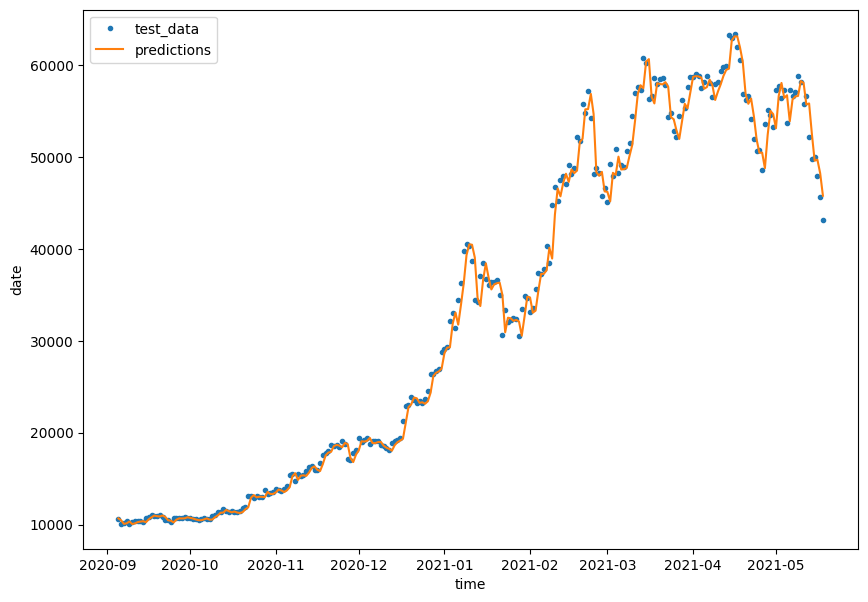

In [54]:
offset=300

plt.figure(figsize=(10,7))
plot_data(timesteps=x_test[-len(windows_test):],
          values=(labels_test[:, 0]),
          start=offset,
          label="test_data")
plot_data(timesteps=x_test[-len(windows_test):],
          values=model_1_preds,
          start=offset,
          format="-",
          label="predictions")

In [55]:
labels_test=tf.expand_dims(labels_test,axis=1)

### MODEL_2_WITH_WINDOW_SIZE=30

In [56]:
windows_30, labels_30 = make_windows(price, window_size=30, horizon=HORIZON)
len(windows), len(labels)

(2780, 2780)

In [57]:
split_size=int(0.8*len(windows))
windows_train_30,labels_train_30=windows_30[:split_size],labels_30[:split_size]

windows_test_30,labels_test_30=windows_30[split_size:],labels_30[split_size:]
len(windows_train_30), len(windows_test_30), len(labels_train_30), len(labels_test_30)

(2224, 533, 2224, 533)

In [58]:
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(windows_train_30,
            labels_train_30,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(windows_test_30, labels_test_30),
            callbacks=[create_callback(model_name=model_2.name)])

In [59]:
model_2.evaluate(windows_test_30, labels_test_30)

17/17 [==============================] - 0s 4ms/step - loss: 677.4415


677.4415283203125

In [60]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(windows_test_30, labels_test_30)

17/17 [==============================] - 0s 3ms/step - loss: 616.8071


616.80712890625

In [61]:
model_2_preds = make_preds(model_2,
                           input_data=windows_test_30)

17/17 [==============================] - 0s 3ms/step


In [62]:
model_2_results = evaluate_preds(y_true=tf.squeeze(labels_test_30), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results


{'mae': 616.8071,
 'mse': 1303355.0,
 'rmse': 1141.6458,
 'mape': 2.7472157,
 'mase': 9.163136}

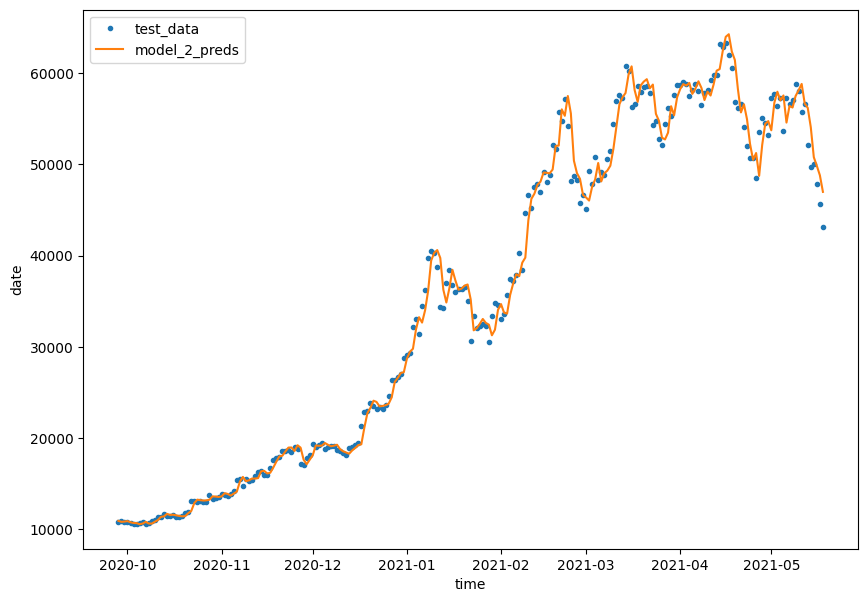

In [63]:
offset = 300
plt.figure(figsize=(10, 7))

plot_data(timesteps=x_test[-len(windows_test_30):],
          values=labels_test_30[:, 0],
          start=offset, label="test_data")
plot_data(timesteps=x_test[-len(windows_test_30):],
          values=model_2_preds,
          start=offset, format="-", label="model_2_preds")

In [64]:
labels_test_30=tf.expand_dims(labels_test_30,axis=1)

In [65]:
labels_test_30.shape

TensorShape([533, 1, 1])

## MODEL 3

In [66]:
HORIZON=7,
WINDOW_SIZE=30



In [67]:
windows,labels=make_windows(price,window_size=30,horizon=7)
len(windows),len(labels)

(2751, 2751)

In [68]:
split_size=int(0.8*len(windows))
windows_train,labels_train=windows[:split_size],labels[:split_size]

windows_test,labels_test=windows[split_size:],labels[split_size:]

In [69]:
tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(7)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(windows_train,
            labels_train,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(windows_test, labels_test),
            callbacks=[create_callback(model_name=model_3.name)])

In [70]:
model_3.evaluate(windows_test, labels_test)

18/18 [==============================] - 0s 2ms/step - loss: 1355.8235


1355.823486328125

In [71]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(windows_test, labels_test)

18/18 [==============================] - 0s 2ms/step - loss: 1225.5549


1225.554931640625

In [72]:
model_3_preds = make_preds(model_3,
                           input_data=windows_test)
model_3_preds[:3]


18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[9406.317, 9486.05 , 9368.78 , 9527.249, 9455.036, 9513.212,
        9644.01 ],
       [8992.047, 9046.839, 8999.805, 9227.592, 9182.013, 9091.581,
        9102.622],
       [8738.794, 8904.724, 8977.535, 9126.487, 8965.805, 8817.111,
        8893.004]], dtype=float32)>

In [73]:
model_3_results = evaluate_preds(y_true=tf.squeeze(labels_test),
                                 y_pred=model_3_preds)
model_3_results


{'mae': array([ 692.5928  ,  350.34332 ,  311.1766  ,  474.92563 ,  568.7751  ,
         586.1994  ,  489.13043 ,  492.49686 ,  513.9063  ,  661.48816 ,
         798.7915  ,  791.1953  ,  844.9956  ,  840.25476 ,  646.2215  ,
         270.4401  ,  194.92899 ,  241.3012  ,  209.0468  ,  244.29422 ,
         174.55392 ,  172.7793  ,  325.95062 ,  341.69287 ,  212.28857 ,
         160.3466  ,  115.69287 ,   98.71952 ,  118.45299 ,  156.55357 ,
         281.61588 ,  360.23297 ,  290.5141  ,  341.75146 ,  265.12695 ,
         290.57715 ,  298.43695 ,  246.25705 ,  231.78523 ,  225.33336 ,
         437.7729  ,   85.53927 ,   73.99261 ,   60.919575,   97.7403  ,
         118.12493 ,   90.39481 ,   71.66588 ,   48.804897,   63.928852,
          95.95033 ,  119.4329  ,  214.63037 ,  212.61496 ,  263.03278 ,
         369.72418 ,  530.08545 ,  552.0653  ,  461.34494 ,  489.68674 ,
         426.40192 ,  228.44789 ,  283.61978 ,  347.99115 ,  387.14307 ,
         440.73404 ,  444.55176 ,  528.2088 

In [74]:
## updating evaluate preds


In [75]:
def evaluate_preds(y_true, y_pred):

 # tensorflows default is float 32 hence we foramt it to match
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)


  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [76]:
model_3_preds = make_preds(model_3,
                           input_data=windows_test)
model_3_preds[:3]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[9406.317, 9486.05 , 9368.78 , 9527.249, 9455.036, 9513.212,
        9644.01 ],
       [8992.047, 9046.839, 8999.805, 9227.592, 9182.013, 9091.581,
        9102.622],
       [8738.794, 8904.724, 8977.535, 9126.487, 8965.805, 8817.111,
        8893.004]], dtype=float32)>

In [77]:
model_3_results = evaluate_preds(y_true=tf.squeeze(labels_test),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1225.5549,
 'mse': 5299860.5,
 'rmse': 1409.7349,
 'mape': 5.4982634,
 'mase': 16.637442}

### Visualising our predictions

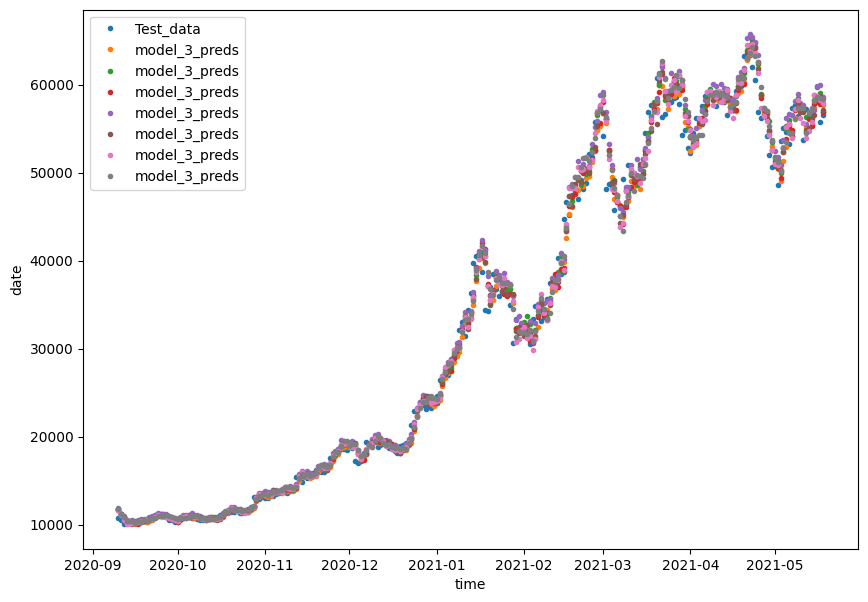

In [78]:
offset=300
plt.figure(figsize=(10,7))
plot_data(timesteps=x_test[-len(windows_test):], values=labels_test[:, 0], start=offset, label="Test_data")

plot_data(timesteps=x_test[-len(windows_test):], values=model_3_preds, start=offset, label="model_3_preds")


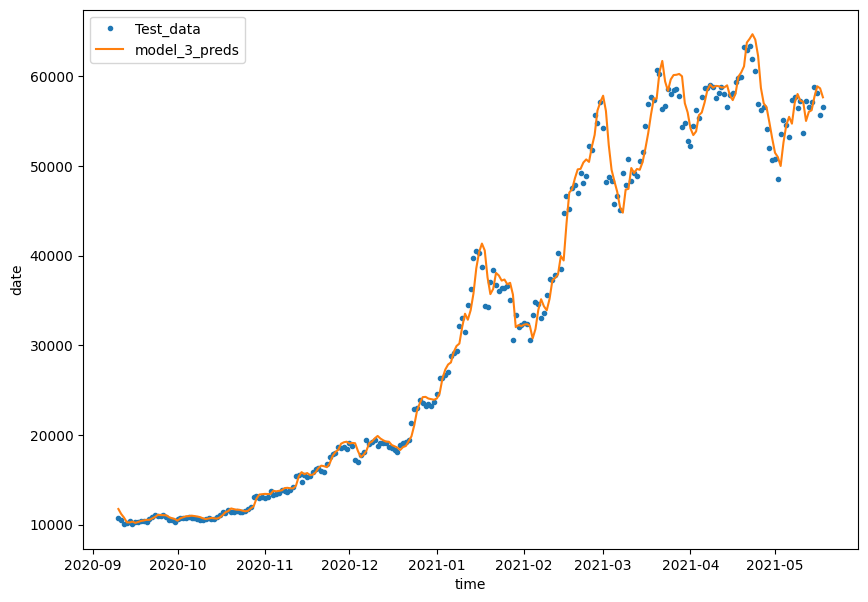

In [79]:

offset = 300
plt.figure(figsize=(10, 7))

plot_data(timesteps=x_test[-len(windows_test):],
                 values=labels_test[:, 0],
                 start=offset,
                 label="Test_data")
plot_data(timesteps=x_test[-len(windows_test):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")


## comparing the models

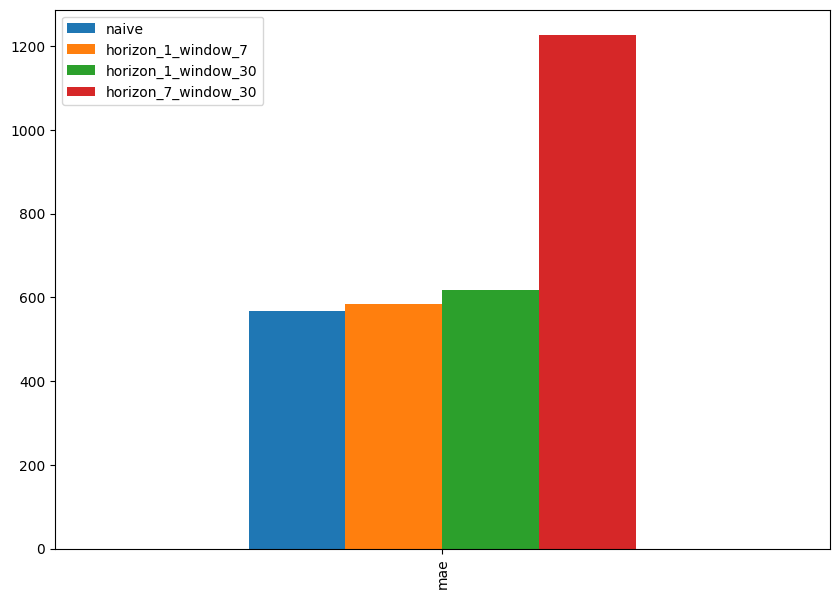

In [80]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");


## MODEL_4 CONV_1_D

In [81]:
HORIZON = 1
WINDOW_SIZE = 7

windows, labels = make_windows(price, window_size=WINDOW_SIZE, horizon=HORIZON)


split_size=int(0.8*len(windows))
windows_train,labels_train=windows[:split_size],labels[:split_size]

windows_test,labels_test=windows[split_size:],labels[split_size:]


In [82]:
windows_train[0].shape

(7,)

In [83]:
x = tf.constant(windows_train_30[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (30,)
Expanded shape: (30, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]
 [123.033  ]
 [124.049  ]
 [125.96116]
 [125.27966]
 [125.9275 ]
 [126.38333]
 [135.24199]
 [133.20332]
 [142.76334]
 [137.92332]
 [142.95166]
 [152.55183]
 [160.33884]
 [164.31499]
 [177.63333]
 [188.29716]
 [200.70166]
 [180.355  ]
 [175.03166]
 [177.6965 ]
 [187.15984]
 [192.75665]
 [197.4    ]]


In [84]:
tf.random.set_seed(42)


model_4 = tf.keras.Sequential([

  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")


model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())


model_4.fit(windows_train,
            labels_train,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(windows_test, labels_test),
            callbacks=[create_callback(model_name=model_4.name)])


In [85]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [86]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(windows_test, labels_test)


18/18 [==============================] - 0s 4ms/step - loss: 568.9542


568.9542236328125

In [87]:
model_4_preds = make_preds(model_4, windows_test)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8876.596 , 8766.4   , 9004.004 , 8782.533 , 8723.277 , 8744.803 ,
       8675.746 , 8521.5205, 8456.013 , 8515.25  ], dtype=float32)>

In [88]:
model_4_results = evaluate_preds(y_true=tf.squeeze(labels_test),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 568.9542,
 'mse': 1178801.9,
 'rmse': 1085.7264,
 'mape': 2.5505242,
 'mase': 9.1936655}

## MODEL_5_LSTM

In [89]:
tf.random.set_seed(42)


inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)

x = layers.LSTM(128, activation="relu")(x)

output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")


model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())


model_5.fit(windows_train,
            labels_train,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(windows_test, labels_test),
            callbacks=[create_callback(model_name=model_5.name)])

In [90]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(windows_test, labels_test)


18/18 [==============================] - 0s 2ms/step - loss: 584.8929


584.8928833007812

In [91]:
model_5_preds = make_preds(model_5, windows_test)
model_5_preds[:10]


18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8964.611, 8833.998, 9013.27 , 8833.695, 8770.535, 8775.613,
       8722.283, 8580.121, 8499.135, 8546.697], dtype=float32)>

In [92]:
model_5_results = evaluate_preds(y_true=tf.squeeze(labels_test),
                                 y_pred=model_5_preds)
model_5_results



{'mae': 584.8929,
 'mse': 1234387.4,
 'rmse': 1111.0298,
 'mape': 2.63935,
 'mase': 9.451217}

In [93]:
model_1_results

{'mae': 583.70416,
 'mse': 1187437.9,
 'rmse': 1089.6962,
 'mape': 2.61538,
 'mase': 9.432008}

## Multivariate time series data

In [94]:
bitcoin_prices_df.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [95]:
# reference link https://coincodex.com/article/22929/bitcoin-halving-dates/

In [96]:
block_reward_1 = 50 # 3 January 2009 (2009-01-03)
block_reward_2 = 25
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")


In [97]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices_df.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices_df.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [98]:
bitcoin_prices_block=bitcoin_prices_df.copy()

bitcoin_prices_block["block reward"]=None

In [99]:
bitcoin_prices_block.iloc[:block_reward_2_days,-1]=block_reward_2

In [100]:
bitcoin_prices_block.head()

,Price,block reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [101]:
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1]=block_reward_3

In [102]:
bitcoin_prices_block[1520:1550]

,Price,block reward
Date,,
2017-11-29,10295.62250,12.5
2017-11-30,10542.66250,12.5
2017-12-01,9706.10375,12.5
2017-12-02,10923.20125,12.5
2017-12-03,10973.54375,12.5
2017-12-04,11382.20875,12.5
2017-12-05,11597.23125,12.5
2017-12-06,12230.36500,12.5
2017-12-07,13734.52000,12.5


In [103]:
bitcoin_prices_block.iloc[block_reward_3_days:,-1]=block_reward_4

In [104]:
bitcoin_prices_block.tail()

,Price,block reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

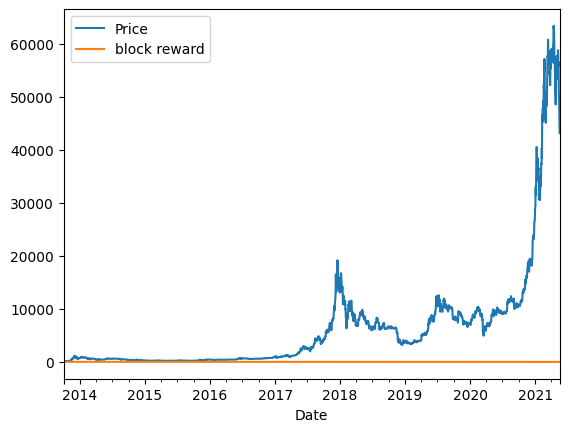

In [105]:
bitcoin_prices_block.plot()

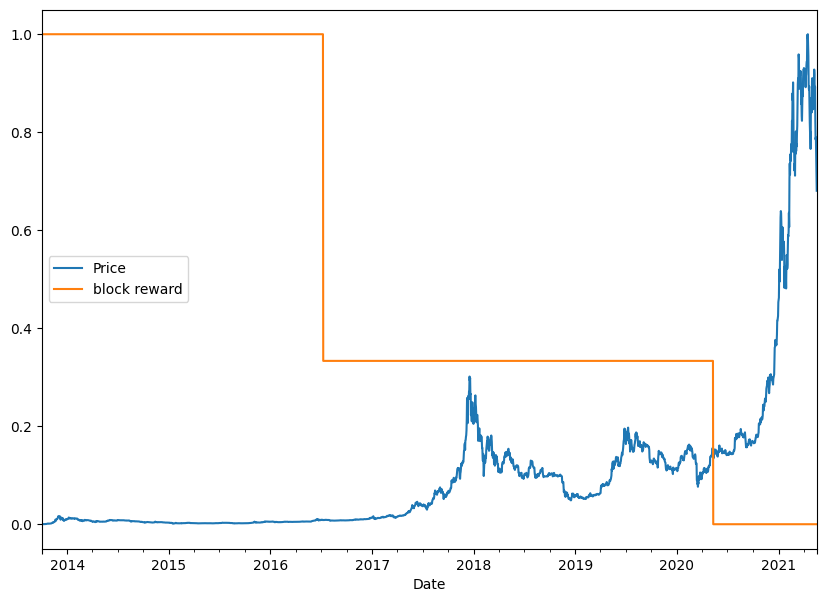

In [106]:
from sklearn.preprocessing import minmax_scale

scaled_bitcoin_prices_block=pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block reward"]]),
                                          columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_bitcoin_prices_block.plot(figsize=(10, 7));

# windowing data

In [107]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()


for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)


,Price,block reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [108]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [109]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

## train and test split

In [110]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## MODEL 6 (MULTIVARIATE DATA)

In [111]:
tf.random.set_seed(42)


model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),

  layers.Dense(HORIZON)
], name="model_6__multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer="adam")

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_callback(model_name=model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 15s - loss: 3470.3416

18/18 [==============================] - 2s 37ms/step - loss: 1559.3041 - val_loss: 1655.6858
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 364.3181 - val_loss: 1942.3320
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 257.4224

18/18 [==============================] - 1s 32ms/step - loss: 232.8140 - val_loss: 1235.4384
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 247.8442

18/18 [==============================] - 1s 31ms/step - loss: 187.6897 - val_loss: 1087.2891
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 178.6420

18/18 [==============================] - 1s 31ms/step - loss: 180.5648 - val_loss: 998.5100
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 174.0157

18/18 [==============================] - 1s 30ms/step - loss: 175.8550 - val_loss: 966.0054
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 214.1061

18/18 [==============================] - 1s 30ms/step - loss: 167.4779 - val_loss: 935.6914
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 161.3759

18/18 [==============================] - 1s 31ms/step - loss: 161.9761 - val_loss: 890.5925
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 159.0321 - val_loss: 893.2794
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 166.7152

18/18 [==============================] - 0s 29ms/step - loss: 153.4602 - val_loss: 844.2043
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 157.4847

18/18 [==============================] - 0s 29ms/step - loss: 148.5548 - val_loss: 824.5745
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 144.8361 - val_loss: 858.9113
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 143.3869 - val_loss: 824.8236
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 146.1909

18/18 [==============================] - 1s 44ms/step - loss: 139.0628 - val_loss: 810.4491
Epoch 15/100
14/18 [======================>.......] - ETA: 0s - loss: 140.1584

18/18 [==============================] - 1s 42ms/step - loss: 138.5040 - val_loss: 778.6588
Epoch 16/100
18/18 [==============================] - 0s 8ms/step - loss: 134.7516 - val_loss: 794.5408
Epoch 17/100
18/18 [==============================] - 0s 8ms/step - loss: 133.0427 - val_loss: 789.6922
Epoch 18/100
14/18 [======================>.......] - ETA: 0s - loss: 136.9529

18/18 [==============================] - 1s 42ms/step - loss: 131.5505 - val_loss: 721.9990
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 127.7544 - val_loss: 730.4871
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 138.5853

18/18 [==============================] - 1s 29ms/step - loss: 126.0729 - val_loss: 693.6370
Epoch 21/100
18/18 [==============================] - 0s 6ms/step - loss: 128.4218 - val_loss: 700.4800
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 124.0986 - val_loss: 697.4101
Epoch 23/100
17/18 [===========================>..] - ETA: 0s - loss: 126.8008

18/18 [==============================] - 1s 50ms/step - loss: 127.9468 - val_loss: 689.9455
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 124.5647

18/18 [==============================] - 1s 31ms/step - loss: 123.0584 - val_loss: 664.5231
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 121.3267

18/18 [==============================] - 1s 30ms/step - loss: 120.6752 - val_loss: 655.8333
Epoch 26/100
17/18 [===========================>..] - ETA: 0s - loss: 119.8729

18/18 [==============================] - 1s 31ms/step - loss: 120.3256 - val_loss: 649.8221
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 120.2816

18/18 [==============================] - 1s 32ms/step - loss: 120.2816 - val_loss: 643.9034
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 112.0754

18/18 [==============================] - 1s 30ms/step - loss: 117.4062 - val_loss: 643.1238
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 114.4421

18/18 [==============================] - 0s 28ms/step - loss: 117.6098 - val_loss: 631.2513
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 121.3961 - val_loss: 631.8029
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 126.7622

18/18 [==============================] - 1s 29ms/step - loss: 114.8500 - val_loss: 630.5460
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 114.8449

18/18 [==============================] - 1s 32ms/step - loss: 114.8449 - val_loss: 625.8949
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 115.1747 - val_loss: 652.5458
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 143.5551

18/18 [==============================] - 1s 29ms/step - loss: 114.7884 - val_loss: 612.1763
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 112.8368 - val_loss: 632.1874
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 116.1570 - val_loss: 615.7798
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 136.9226

18/18 [==============================] - 1s 29ms/step - loss: 113.5142 - val_loss: 601.8368
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 103.3023

18/18 [==============================] - 0s 29ms/step - loss: 112.3174 - val_loss: 599.9062
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8380 - val_loss: 601.6983
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9719 - val_loss: 604.6575
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7245 - val_loss: 631.7121
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 116.0875 - val_loss: 669.0345
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 118.2756 - val_loss: 651.4399
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3963 - val_loss: 602.6089
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5309 - val_loss: 606.8833
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8273 - val_loss: 637.9016
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 11

18/18 [==============================] - 1s 30ms/step - loss: 114.0549 - val_loss: 592.9961
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 129.4834

18/18 [==============================] - 1s 38ms/step - loss: 110.5512 - val_loss: 578.6385
Epoch 56/100
18/18 [==============================] - 0s 7ms/step - loss: 108.2742 - val_loss: 817.1813
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 119.1130 - val_loss: 595.6963
Epoch 58/100
18/18 [==============================] - 0s 7ms/step - loss: 115.7701 - val_loss: 668.0560
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3505 - val_loss: 609.3631
Epoch 60/100
18/18 [==============================] - 0s 8ms/step - loss: 108.2874 - val_loss: 580.6968
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 107.8399 - val_loss: 583.1310
Epoch 62/100
14/18 [======================>.......] - ETA: 0s - loss: 106.7461

18/18 [==============================] - 1s 41ms/step - loss: 106.5682 - val_loss: 578.4849
Epoch 63/100
18/18 [==============================] - 0s 8ms/step - loss: 108.3463 - val_loss: 598.7051
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 108.3960 - val_loss: 592.2589
Epoch 65/100
14/18 [======================>.......] - ETA: 0s - loss: 108.4203

18/18 [==============================] - 1s 31ms/step - loss: 108.6017 - val_loss: 577.1243
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3993 - val_loss: 604.6294
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 107.5380 - val_loss: 681.4506
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 107.5023 - val_loss: 596.1354
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7580 - val_loss: 636.7314
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 114.7712 - val_loss: 580.0231
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 108.6901 - val_loss: 579.0889
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9146 - val_loss: 651.0129
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 108.8746 - val_loss: 581.9734
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 10

18/18 [==============================] - 1s 30ms/step - loss: 106.8856 - val_loss: 576.1658
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 99.5994

18/18 [==============================] - 0s 29ms/step - loss: 106.5934 - val_loss: 573.8907
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 106.2664 - val_loss: 600.6924
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2687 - val_loss: 575.1739
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 105.9222 - val_loss: 580.5329
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 117.5152 - val_loss: 581.8016
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7791 - val_loss: 662.9133
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 111.8603 - val_loss: 586.3962
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9584 - val_loss: 590.2699
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 105.6241 - val_loss: 613.3480
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 10

18/18 [==============================] - 1s 31ms/step - loss: 106.3654 - val_loss: 571.8940
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 148.7264

18/18 [==============================] - 0s 29ms/step - loss: 108.6912 - val_loss: 569.3766
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 107.4864 - val_loss: 580.7394


In [112]:
model_6 = tf.keras.models.load_model("model_experiments/model_6__multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 569.3766


569.3766479492188

In [113]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8842.785, 8765.965, 9028.777, 8781.225, 8732.923, 8723.982,
       8683.675, 8509.835, 8452.945, 8522.831], dtype=float32)>

In [114]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 569.3766,
 'mse': 1170550.5,
 'rmse': 1081.9198,
 'mape': 2.5730903,
 'mase': 9.200491}

In [115]:
model_1_results

{'mae': 583.70416,
 'mse': 1187437.9,
 'rmse': 1089.6962,
 'mape': 2.61538,
 'mase': 9.432008}

In [116]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 9.193477}

## NBEATS

## creating our own custom layer by subclassing layers class

In [117]:
from IPython.display import Image, display
display(Image(filename='arch.png'))

## we are replicating this architecture

FileNotFoundError: ignored

In [118]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class ie layer here  (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers


    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]

    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast


In [119]:
dummy_nbeats_block = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)



In [120]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2) hence we used expand dims
dummy_inputs


<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [121]:
backcast, forecast = dummy_nbeats_block(dummy_inputs)

print(f"Backcast: {tf.squeeze(backcast.numpy())}") ## squeeze output back to ndim 1
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.224183    0.05031645  0.14968605  0.13103054 -0.28239566  0.52375937
  0.6887462 ]
Forecast: 0.4025147259235382


In [122]:
HORIZON = 1
WINDOW_SIZE = 7



In [123]:
bitcoin_prices_nbeats = bitcoin_prices_df.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [124]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]


split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [125]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)


train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))


BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)# autotune uses the max and optimal no of gpu avaialbel
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [126]:
## depth is no of layers ____
## width is no of neurons |



In [127]:
## we are referencing this paper for model architecture and hyperparameters

# https://arxiv.org/pdf/1905.10437.pdf

In [128]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

## MODEL 7 NBEATS

In [129]:
%%time

tf.random.set_seed(42)

nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")


stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

backcast, forecast = nbeats_block_layer(stack_input)

residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")
for i, _ in enumerate(range(N_STACKS-1)):
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

  model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")





CPU times: user 1.68 s, sys: 20.3 ms, total: 1.7 s
Wall time: 1.67 s


In [130]:
model_7.compile(loss="mae",
                optimizer="adam",
                metrics=["mae", "mse"])

In [131]:
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=1,

            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 1/5000
3/3 [==============================] - 54s 909ms/step - loss: 87299.6328 - mae: 87299.6328 - mse: 24499642368.0000 - val_loss: 18573.8594 - val_mae: 18573.8594 - val_mse: 623136768.0000 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 0s 167ms/step - loss: 770.2404 - mae: 770.2404 - mse: 1402604.3750 - val_loss: 11641.0957 - val_mae: 11641.0957 - val_mse: 250894352.0000 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 69ms/step - loss: 2087.5408 - mae: 2087.5408 - mse: 12605204.0000 - val_loss: 16556.5996 - val_mae: 16556.5996 - val_mse: 496448704.0000 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 0s 132ms/step - loss: 3708.4241 - mae: 3708.4241 - mse: 38949052.0000 - val_loss: 1179.1160 - val_mae: 1179.1160 - val_mse: 4669575.5000 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 0s 65ms/step - loss: 538.8156 - mae: 538.8156 - mse: 1063191.2500 - val_loss: 3361.5505 - val_mae: 3361.5505 - val_mse: 222798

In [132]:
model_7.evaluate(test_dataset)


1/1 [==============================] - 0s 39ms/step - loss: 576.3600 - mae: 576.3600 - mse: 1177053.3750


[576.3600463867188, 576.3600463867188, 1177053.375]

In [133]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 2s 2s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8888.795, 8802.784, 8983.972, 8799.918, 8760.862, 8774.686,
       8669.341, 8521.279, 8490.619, 8497.556], dtype=float32)>

In [134]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results


{'mae': 576.36005,
 'mse': 1177053.4,
 'rmse': 1084.9209,
 'mape': 2.6850975,
 'mase': 9.313335}

In [135]:
model_1_results

{'mae': 583.70416,
 'mse': 1187437.9,
 'rmse': 1089.6962,
 'mape': 2.61538,
 'mase': 9.432008}

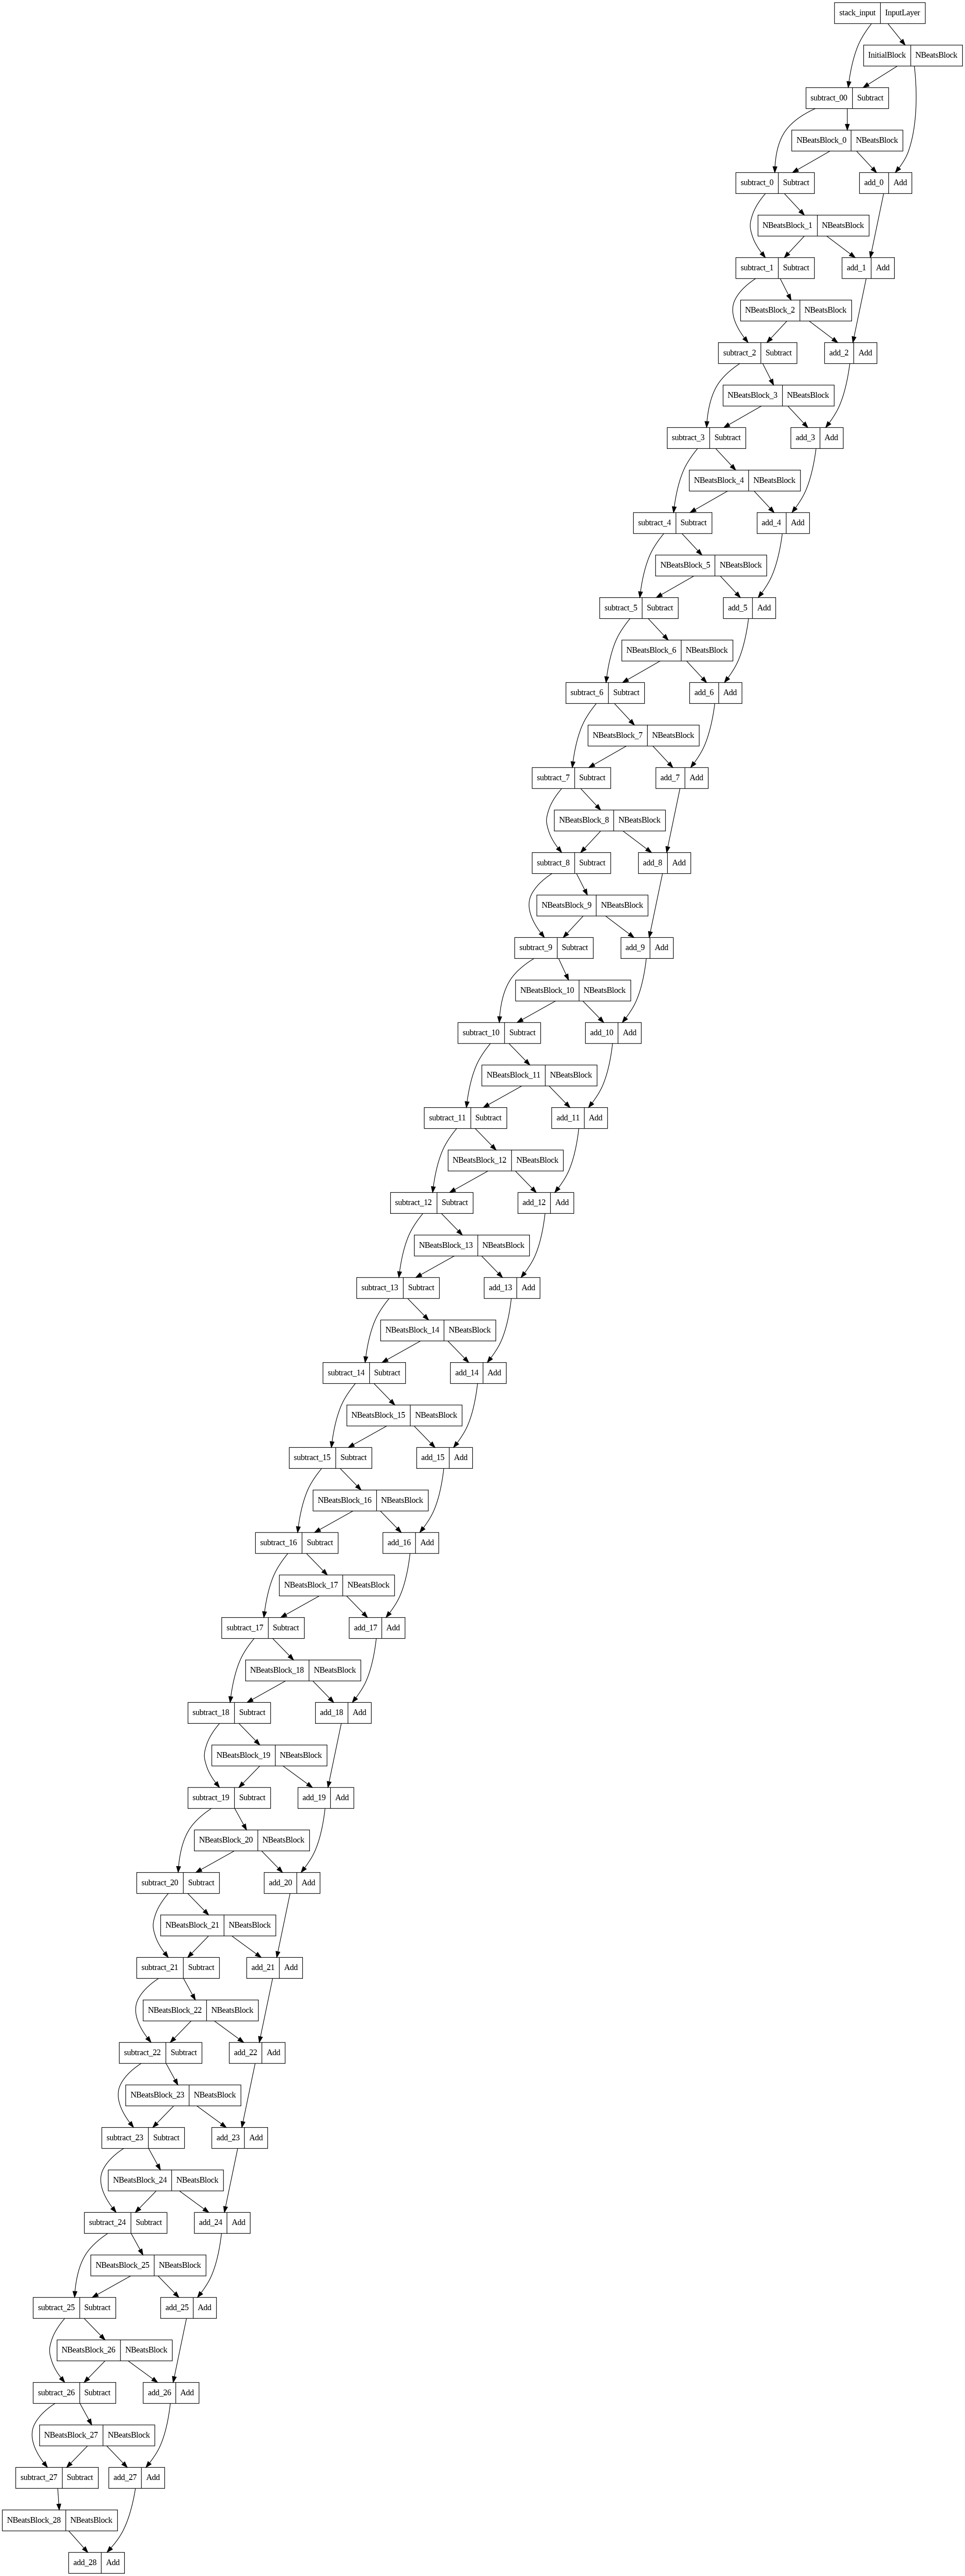

In [136]:
from tensorflow.keras.utils import plot_model

plot_model(model_7)

## MODEL 8 ENSEMBLE MODEL

In [137]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):



 ensemble_models = []

 for i in range(num_iter):

    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")


      model = tf.keras.Sequential([

        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compiling  simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])


      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,

                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])


      ensemble_models.append(model)

 return ensemble_models # return list of trained models

In [138]:
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)


Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 580: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 618: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 718: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 124: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 261: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 475: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 575: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 234: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 334: ReduceLROnPl

In [139]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [140]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 68ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8796.935,  8767.136,  9039.182, ..., 49812.434, 49261.336,
        45974.168],
       [ 8739.408,  8746.683,  9071.926, ..., 50016.953, 47880.53 ,
        45632.465],
       [ 8798.97 ,  8808.016,  9074.889, ..., 49920.566, 48248.33 ,
        46244.78 ],
       ...,
       [ 8760.491,  8749.918,  9094.706, ..., 49798.39 , 48342.176,
        46312.438],
       [ 8596.372,  8627.433,  8894.29 , ..., 48579.9  , 47163.746,
        44707.742],
       [ 8760.255,  8746.229,  9006.213, ..., 50029.35 , 47944.117,
        45430.14 ]], dtype=float32)>

In [141]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions.we can use mean also
ensemble_results

{'mae': 566.5521,
 'mse': 1141837.6,
 'rmse': 1068.568,
 'mape': 2.5604703,
 'mase': 9.15485}

## finding the range of our price forecast

In [142]:
def get_upper_lower(preds):

  std = tf.math.reduce_std(preds, axis=0)


  interval = 1.96 * std # 1.96 covers 95% data in a normal distribution hence ...


  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper


In [143]:

lower, upper = get_upper_lower(preds=ensemble_preds)

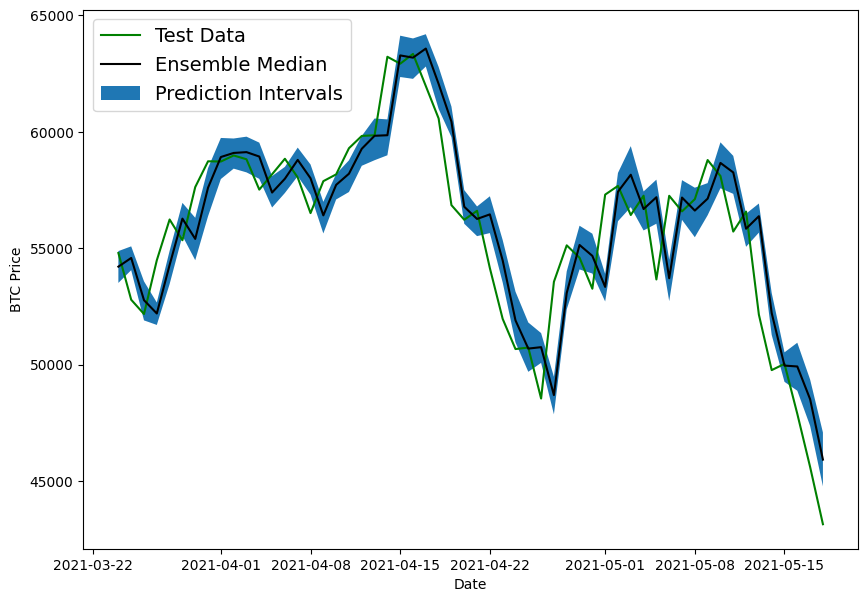

In [144]:
ensemble_median = np.median(ensemble_preds, axis=0)


offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

## MODEL 9 REAL FUTURE PREDICTION

In [147]:
X_all = bitcoin_prices_windowed.drop(["Price", "block reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [149]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [150]:
tf.random.set_seed(42)


model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])


model_9.compile(loss="mae",
                optimizer="adam")

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

In [151]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:


  future_forecast = []
  last_window = values[-WINDOW_SIZE:]


  for _ in range(into_future):


    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")


    future_forecast.append(tf.squeeze(future_pred).numpy())



    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [152]:

# No of timesteps to predict into the future
INTO_FUTURE = 14
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 52ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 54823.953125

1/1 [==============================] - 0s 25ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 54823.953125  ] -> Prediction: 50985.73046875

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 54823.953125   50985.73046875] -> Prediction: 49622.12890625

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 54823.953125   50985.73046875 49622.12890625] -> Prediction: 48480.82421875

1/1 [==============================] - 0s 22ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 54823.953125
 50985.73046875 49622.12890625 48480.82421

In [153]:
def get_future_dates(start_date, into_future, offset=1):

  start_date = start_date + np.timedelta64(offset, "D")
  end_date = start_date + np.timedelta64(into_future, "D")
  return np.arange(start_date, end_date, dtype="datetime64[D]")




In [154]:
last_timestep = bitcoin_prices_df.index[-1]
last_timestep


Timestamp('2021-05-18 00:00:00')

In [155]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps


array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [156]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

## adding previous timestep and data into future predicted model for continuity

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 54823.953, 50985.73 , 49622.13 , 48480.824, 45886.707,
        44707.445, 49092.984, 53266.168, 50324.33 , 48569.34 , 46438.08 ,
        44959.676, 47207.523, 51514.848], dtype=float32))

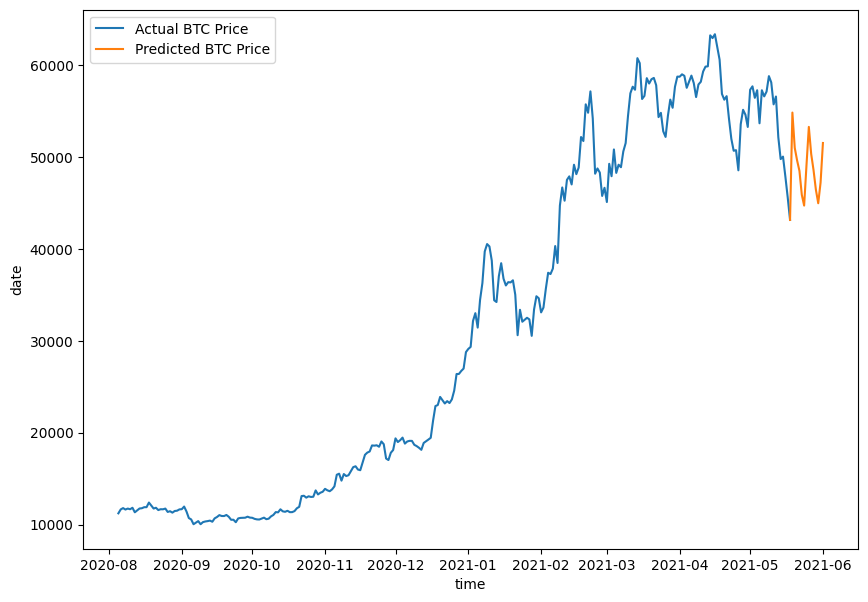

In [157]:
plt.figure(figsize=(10, 7))
plot_data(bitcoin_prices_df.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_data(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")


## comparing all models results

In [158]:
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              }).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1147547.000,1071.236206,2.516525,9.193477
model_1_dense_w7_h1,583.704163,1187437.875,1089.696167,2.615380,9.432008
model_2_dense_w30_h1,616.807129,1303355.000,1141.645752,2.747216,9.163136
model_3_dense_w30_h7,1225.554932,5299860.500,1409.734863,5.498263,16.637442
model_4_CONV1D,568.954224,1178801.875,1085.726440,2.550524,9.193666
model_5_LSTM,584.892883,1234387.375,1111.029785,2.639350,9.451217
model_6_multivariate,569.376587,1170550.500,1081.919800,2.573090,9.200491
model_8_NBEATs,576.360046,1177053.375,1084.920898,2.685097,9.313335
model_9_ensemble,566.552124,1141837.625,1068.567993,2.560470,9.154850


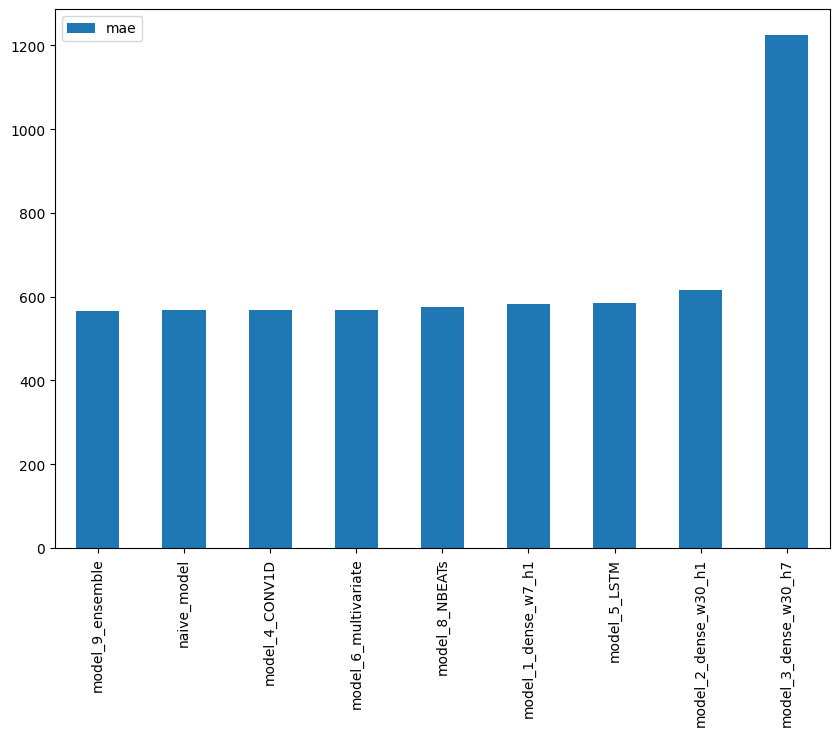

In [159]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");